In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
pr = xr.open_mfdataset("../../../data/2.2km/rcp85/01/pr/*.nc")

In [3]:
pr.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:                     (bnds: 2, ensemble_member: 1, grid_latitude: 606, grid_longitude: 484, time: 720)
Coordinates:
  * ensemble_member             (ensemble_member) int32 1
  * time                        (time) object 1980-12-01 12:00:00 ... 1982-11...
  * grid_latitude               (grid_latitude) float64 -4.683 -4.647 ... 8.063
  * grid_longitude              (grid_longitude) float64 353.9 354.0 ... 364.3
    ensemble_member_id          (ensemble_member) |S27 dask.array<chunksize=(1,), meta=np.ndarray>
    latitude                    (grid_latitude, grid_longitude) float64 dask.array<chunksize=(606, 484), meta=np.ndarray>
    longitude                   (grid_latitude, grid_longitude) float64 dask.array<chunksize=(606, 484), meta=np.ndarray>
    month_number                (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
    year                        (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
 

In [4]:
pr.coords

Coordinates:
  * ensemble_member     (ensemble_member) int32 1
  * time                (time) object 1980-12-01 12:00:00 ... 1982-11-30 12:0...
  * grid_latitude       (grid_latitude) float64 -4.683 -4.647 ... 8.027 8.063
  * grid_longitude      (grid_longitude) float64 353.9 354.0 ... 364.3 364.3
    ensemble_member_id  (ensemble_member) |S27 dask.array<chunksize=(1,), meta=np.ndarray>
    latitude            (grid_latitude, grid_longitude) float64 dask.array<chunksize=(606, 484), meta=np.ndarray>
    longitude           (grid_latitude, grid_longitude) float64 dask.array<chunksize=(606, 484), meta=np.ndarray>
    month_number        (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
    year                (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
    yyyymmdd            (time) |S64 dask.array<chunksize=(360,), meta=np.ndarray>

In [5]:
pr.dims

Frozen(SortedKeysDict({'ensemble_member': 1, 'time': 720, 'grid_latitude': 606, 'grid_longitude': 484, 'bnds': 2}))

In [7]:
pr.attrs

{'collection': 'land-cpm',
 'contact': 'ukcpproject@metoffice.gov.uk',
 'creation_date': '2019-07-30T06:13:12',
 'domain': 'uk',
 'frequency': 'day',
 'institution': 'Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, Devon, EX1 3PB, UK.',
 'institution_id': 'MOHC',
 'project': 'UKCP18',
 'references': 'https://ukclimateprojections.metoffice.gov.uk',
 'resolution': '2.2km',
 'scenario': 'rcp85',
 'source': 'UKCP18 realisation from a set of 12 convection-permitting models (HadREM3-RA11M) driven by perturbed variants of the Met Office Unified Model Global Atmosphere GA7 model (HadREM3-GA705) at 12km resolution.  The HadREM3-GA705 models were driven by perturbed variants of the global HadGEM3-GC3.05',
 'title': 'UKCP18 land projections - 2.2km convection-permitting climate model, Precipitation rateover the UK for the RCP8.5 scenario',
 'version': 'v20190731',
 'Conventions': 'CF-1.5'}

In [9]:
cp_model_rotated_pole = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

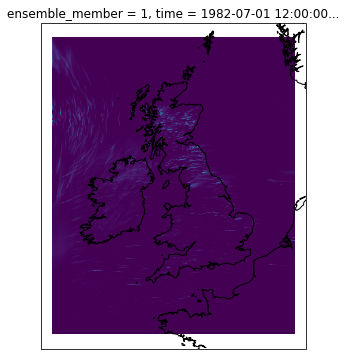

In [14]:
pr_single_day_jul82 = pr.pr.sel(ensemble_member=1, time="1982-07-01 12:00:00")

plt.figure(figsize=(14,6))

ax = plt.axes(projection=cp_model_rotated_pole)

pr_single_day_jul82.plot(ax=ax, x='grid_longitude', y='grid_latitude', add_colorbar=False, transform=cp_model_rotated_pole)
ax.coastlines()

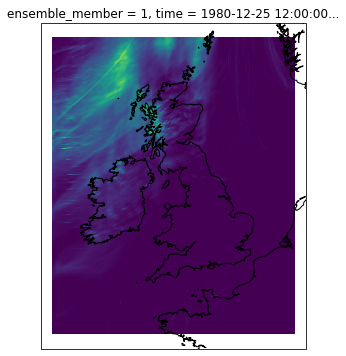

In [15]:
pr_single_day_dec80 = pr.pr.sel(ensemble_member=1, time="1980-12-25 12:00:00")

plt.figure(figsize=(14,6))

ax = plt.axes(projection=cp_model_rotated_pole)

pr_single_day_dec80.plot(ax=ax, x='grid_longitude', y='grid_latitude', add_colorbar=False, transform=cp_model_rotated_pole)
ax.coastlines()